### Applying the json to pandas dataframe conversion to the portfolio data

For this I looked at my [first attempt](C:/_sandbox/Jupyter/mongodb_to_dataframe_in_Jupyter.ipynb) to make this conversion, 

as well as the [mongodb playground file](C:/_sandbox/mongodb_playgrounds/query_match_and_merge.mongodb) to see how to query the data.

In [31]:

from pymongo import MongoClient
import pandas as pd

uri = os.getenv('MONGO_URI')
client = MongoClient(uri)

# database code goes here
db = client.General

portfolios = db.portfoliov2.find({})
metrics = db.v2_metrics.find({})
companies = db.v2_companies.find({})

# load into local variables, in this case lists of documents (lists because the find() method returns seperate documents)
portfolio = []
metrics_df = []
companies_db = []

for doc in portfolios:
    portfolio.append(doc)
# print(portfolio)

for doc in metrics:
    metrics_df.append(doc)
# print(metrics_df)

for doc in companies:
    companies_db.append(doc) 
# print(companies_df)

c:\Users\johan\.conda\envs\joh_env\lib\site-packages\pymongo\common.py:813: UserWarning: Unknown option writeconcern
  warnings.warn(str(exc))


In [32]:
# Close the connection to MongoDB when you're done.
client.close()

In [33]:
portfolio

[{'_id': ObjectId('638abd41f9d217c5076f936d'),
  'name': 'Test2',
  'aum': 1000000,
  'percentage_of_equities': 53,
  'company_weights': [{'company_id': '6282b17435c8760dac9ce15c',
    'weight': '10',
    'market_cap': 1881420464128.0,
    'currency': 'USD',
    'yhName': 'Microsoft Corporation',
    'usd_currency': 1901039058944.0},
   {'company_id': '6282b17435c8760dac9ce161',
    'weight': '5',
    'market_cap': 28437708800.0,
    'currency': 'EUR',
    'usd_currency': 24429479936.0,
    'yhName': 'Adidas AG'},
   {'company_id': '6282b17435c8760dac9ce174',
    'weight': '3',
    'market_cap': 491321622528.0,
    'currency': 'USD',
    'yhName': 'Taiwan Semiconductor Manufacturing Company Limited',
    'usd_currency': '123123'},
   {'company_id': '6282b17435c8760dac9ce17b',
    'weight': '2',
    'market_cap': 521899540480.0,
    'currency': 'USD',
    'yhName': 'NVIDIA Corporation',
    'usd_currency': '1124234235'},
   {'company_id': '6282b17435c8760dac9ce165',
    'weight': '1',
 

In [34]:
df = pd.DataFrame(portfolio)
df.head()

,_id,name,aum,percentage_of_equities,company_weights,__v,code,client_id
0,638abd41f9d217c5076f936d,Test2,1000000,53,"[{'company_id': '6282b17435c8760dac9ce15c', 'w...",0,NaN,NaN
1,638d6b1f7e3fc3ac011bfc66,Demo ESG portfolio,5500000,66,"[{'company_id': '6282b17435c8760dac9ce174', 'w...",0,YLD-VAL-NEU-FX,NaN
2,638dd16e963f6418bde5fc71,Yield ORIGINAL,1000000,30,"[{'company_id': '6282b17435c8760dac9ce174', 'w...",0,,NaN
3,63f65286805a9473e54b507e,YLD-SDG-NEU-FX,1000000,50,"[{'company_id': '6282b17435c8760dac9ce174', 'w...",0,,638d6a26600f7062a1ccd713
4,63f65321805a9473e54b50b6,YLD-SDG-DEF-FX,1000000,30,"[{'company_id': '6282b17435c8760dac9ce174', 'w...",0,,638d6a26600f7062a1ccd713


In [35]:
df_yield = pd.DataFrame(df.company_weights[2])
df_yield.columns

Index(['company_id', 'weight', 'market_cap', 'currency', 'yhName',
       'usd_currency'],
      dtype='object')

In [36]:
df_yield = df_yield[['company_id', 
                     'weight', 
                     'market_cap', 
                    #  'currency', 
                     'yhName',
                     'usd_currency']] 
df_yield.head(10)

,company_id,weight,market_cap,yhName,usd_currency
0,6282b17435c8760dac9ce174,1.07877492024839,422665486336,Taiwan Semiconductor Manufacturing Company Lim...,422665486336
1,6282b17435c8760dac9ce15d,0.8533,244640825344.0,ASML Holding N.V.,244640825344.0
2,6282b17435c8760dac9ce1a4,0.611667,20001038336.0,Xylem Inc.,20001038336.0
3,629dfb86d6043a91df550c79,0.526213564916345,18316000000,"Solaredge Tecnologies, Inc.",18316000000
4,62baa47e57587ab5e9d5d12f,0.4881,732795374665728.0,PT Bank Rakyat Indonesia (Persero) Tbk,49097290103.0
5,6282b17435c8760dac9ce179,0.4431,549574803456.0,"Tesla, Inc.",549574803456.0
6,6282b17435c8760dac9ce22f,0.427,132996980736.0,Deere & Company,132996980736.0
7,62baa43b57587ab5e9d5d122,0.4242,43445235712.0,"MercadoLibre, Inc.",43445235712.0
8,6282b17435c8760dac9ce1f6,0.406067,218900283392.0,Thermo Fisher Scientific Inc.,218900283392.0
9,6282b17435c8760dac9ce231,0.393807,129331314688.0,Unilever PLC,129331314688.0


In [37]:
companies_df = pd.DataFrame(companies_db)
companies_df.head()

,_id,note,sector,hash,market_cap,revenue_2021,ISIN,names,name,revenue,...,metric_Does_use_products_from_Cattle?,MSCIworld,snp500,cdp_id,metric_Does_use_products_from_Timber?,mapping_failed,snp,forest500_link,revenue_in_usd,product_categories
0,6282b17435c8760dac9ce15c,,Technology,-1.602601e+09,2230.0,143.02,None,"[microsoft, microsoft corp]",Microsoft Corporation,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6282b17435c8760dac9ce15d,,Technology,-1.994419e+09,254.0,15.46,NL0010273215,"[asml, asml holding n.v., asml holding nv]",ASML Holding N.V.,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6282b17435c8760dac9ce15e,,Financials; Health Care,-9.614886e+08,435.0,257.14,None,"[unitedhealth, unitedhealth]",UnitedHealth Group Incorporated,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6282b17435c8760dac9ce15f,,Materials,6.799800e+04,32.0,10.00,None,"[dsm, koninklijke dsm n.v., koninkilijke dsm nv]",DSM,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6282b17435c8760dac9ce160,,Industrials,-1.140534e+09,26.0,16.38,None,"[vestas wind systems, vestas wind systems]",Vestas Wind Systems A/S,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
companies_df.columns

Index(['_id', 'note', 'sector', 'hash', 'market_cap', 'revenue_2021', 'ISIN',
       'names', 'name', 'revenue', 'flag', 'ingested', 'ticker', 'mapping',
       'is_new', 'otherNames', 'hqLocation', 'website', 'industry',
       'subIndustry', 'productCategories', 'locationsOfOperation', 'Industry',
       'etf', 'etf_name', 'ingest_source', 'description', 'last_checked',
       'metric_Does_use_products_from_Pulp_or_Paper?',
       'metric_Does_use_products_from_Fur_or_Leather?',
       'metric_Does_use_products_from_Palm_Oil?',
       'metric_Does_use_products_from_Soy?',
       'metric_Does_use_products_from_Cattle?', 'MSCIworld', 'snp500',
       'cdp_id', 'metric_Does_use_products_from_Timber?', 'mapping_failed',
       'snp', 'forest500_link', 'revenue_in_usd', 'product_categories'],
      dtype='object')

To filter a DataFrame in Pandas based on columns, you can use either the double square brackets `[[ ]]` or the `.loc[] `function. 

The `.loc[]` function allows you to filter both rows and columns by labels. To filter only by columns, you can use the colon `:` to select all rows and then specify the column names.

```python
filtered_df = df.loc[:, ['A', 'C']]
```
This will create a new DataFrame filtered_df with only the columns 'A' and 'C'.

In [65]:
companies_df_filtered = companies_df[['_id', 'name', 'ISIN','revenue_2021']]
companies_df_filtered

,_id,name,ISIN,revenue_2021
0,6282b17435c8760dac9ce15c,Microsoft Corporation,None,143.02
1,6282b17435c8760dac9ce15d,ASML Holding N.V.,NL0010273215,15.46
2,6282b17435c8760dac9ce15e,UnitedHealth Group Incorporated,None,257.14
3,6282b17435c8760dac9ce15f,DSM,None,10.00
4,6282b17435c8760dac9ce160,Vestas Wind Systems A/S,None,16.38
...,...,...,...,...
3620,63dfcb55fb52cc8b8ceac117,Cosan S.A.,NaN,NaN
3621,63dfd181fb52cc8b8ceac12d,Ping An Healthcare and Technology Company Limited,NaN,NaN
3622,63f0d655700f8dd3714d46f6,Severn Trent Plc,NaN,NaN
3623,6420b376497ca9f149658914,Johnson Matthey,NaN,NaN


In [45]:
metrics_df = pd.DataFrame(metrics_df)
# metrics_df = pd.json_normalize(metrics_df)
metrics_df

,_id,type,label,value,reporting_period,company_hash,analyst,sourceFile,sourcePage,company_id,...,saved,products,incidents,violations,programs,"Does_company_use_products_from_Soy,_Palm_Oil,_Mining,_Timber,_Fisheries,_Agriculture,_Cattle",Animal_testing?,answer,ingest_source,controversies
0,6282b3ad8aefd6a28a3f7e60,metric,renewable_energy,1101,,-776109781.0,Evgeny Averyanov,,,6282b17435c8760dac9ce1e7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6282b3ad8aefd6a28a3f7e5d,metric,emissions_scope_2_location,835437,,-776109781.0,Evgeny Averyanov,,,6282b17435c8760dac9ce1e7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6282b3ad8aefd6a28a3f7e5b,metric,emissions_scope_1,466784,,-776109781.0,Evgeny Averyanov,,,6282b17435c8760dac9ce1e7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6282b3ad8aefd6a28a3f7e5f,metric,ceo_pay_ratio,106x,,-776109781.0,Evgeny Averyanov,,,6282b17435c8760dac9ce1e7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6282b3ad8aefd6a28a3f7e5c,metric,net_zero_goal,Net zero,,-776109781.0,Evgeny Averyanov,,,6282b17435c8760dac9ce1e7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46568,6425e6f94ee700983bf9e8a4,metric,Hazardous_waste,18000,2020,NaN,NaN,https://assets.new.siemens.com/siemens/assets/...,106,6282b17435c8760dac9ce1b1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46569,6425e7264ee700983bf9ec09,metric,employee_turnover,9.3,2019,NaN,NaN,https://assets.new.siemens.com/siemens/assets/...,86,6282b17435c8760dac9ce1b1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46570,6425e7854ee700983bf9f2f7,metric,Gender_balance_of_the_company’s_workforce,26,2020,NaN,NaN,https://assets.new.siemens.com/siemens/assets/...,91,6282b17435c8760dac9ce1b1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46571,6425e7a64ee700983bf9f59e,metric,Gender_balance_total,26.2,2020,NaN,NaN,https://assets.new.siemens.com/siemens/assets/...,110,6282b17435c8760dac9ce1b1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
metrics_df.columns

Index(['_id', 'type', 'label', 'value', 'reporting_period', 'company_hash',
       'analyst', 'sourceFile', 'sourcePage', 'company_id', 'imported',
       'ingested', 'net_zero_type', 'is_new', 'lastUpdate', 'doubtful', 'ISIN',
       'hash', 'market_cap', 'name', 'names', 'note', 'revenue',
       'revenue_2021', 'sector', 'source_file', 'source_page', 'year',
       'net_zero_goal_type', 'goals', 'saved', 'products', 'incidents',
       'violations', 'programs',
       'Does_company_use_products_from_Soy,_Palm_Oil,_Mining,_Timber,_Fisheries,_Agriculture,_Cattle',
       'Animal_testing?', 'answer', 'ingest_source', 'controversies'],
      dtype='object')

In [57]:
metrics_df_ = metrics_df[['type', 'label', 'value', 'reporting_period', 'company_id']]

metrics_df_c = metrics_df_.copy()
metrics_df_c.loc['value'] = pd.to_numeric(metrics_df_['value'], errors='coerce')
metrics_df_c

,type,label,value,reporting_period,company_id
0,metric,renewable_energy,1101,,6282b17435c8760dac9ce1e7
1,metric,emissions_scope_2_location,835437,,6282b17435c8760dac9ce1e7
2,metric,emissions_scope_1,466784,,6282b17435c8760dac9ce1e7
3,metric,ceo_pay_ratio,106x,,6282b17435c8760dac9ce1e7
4,metric,net_zero_goal,Net zero,,6282b17435c8760dac9ce1e7
...,...,...,...,...,...
46569,metric,employee_turnover,9.3,2019,6282b17435c8760dac9ce1b1
46570,metric,Gender_balance_of_the_company’s_workforce,26,2020,6282b17435c8760dac9ce1b1
46571,metric,Gender_balance_total,26.2,2020,6282b17435c8760dac9ce1b1
46572,metric,Gender_balance_total,26.3,2019,6282b17435c8760dac9ce1b1


Note: I had to `.copy()` the dataframe to avoid the SettingWithCopyWarning.

Then use the `.loc[]` to replace the values in the dataframe with a numeric type. 

In [58]:
metrics_df_c = metrics_df_c[~pd.isna(metrics_df_c['value'])] # to drop the Nan values
metrics_df_c

,type,label,value,reporting_period,company_id
0,metric,renewable_energy,1101,,6282b17435c8760dac9ce1e7
1,metric,emissions_scope_2_location,835437,,6282b17435c8760dac9ce1e7
2,metric,emissions_scope_1,466784,,6282b17435c8760dac9ce1e7
3,metric,ceo_pay_ratio,106x,,6282b17435c8760dac9ce1e7
4,metric,net_zero_goal,Net zero,,6282b17435c8760dac9ce1e7
...,...,...,...,...,...
46568,metric,Hazardous_waste,18000,2020,6282b17435c8760dac9ce1b1
46569,metric,employee_turnover,9.3,2019,6282b17435c8760dac9ce1b1
46570,metric,Gender_balance_of_the_company’s_workforce,26,2020,6282b17435c8760dac9ce1b1
46571,metric,Gender_balance_total,26.2,2020,6282b17435c8760dac9ce1b1


In [ ]:
filtered = metrics_df[metrics_df['value'] == 'Net zero']
filtered[['company_id','value']].head()

,company_id,value
4,6282b17435c8760dac9ce1e7,Net zero
51,6282b17435c8760dac9ce1ef,Net zero
58,6282b17435c8760dac9ce1ee,Net zero
136,6282b17435c8760dac9ce1ff,Net zero
159,6282b17435c8760dac9ce1f8,Net zero


by specifying `.astype(str)` I was able to convert the data to a string while filtering it

In [ ]:
metrics_df['company_id'] = metrics_df['company_id'].astype(str)

filtered = metrics_df[metrics_df['company_id'] == '629dfb86d6043a91df550c79']
filtered.head()

,_id,type,label,value,reporting_period,company_hash,analyst,sourceFile,sourcePage,company_id,...,saved,products,incidents,violations,programs,"Does_company_use_products_from_Soy,_Palm_Oil,_Mining,_Timber,_Fisheries,_Agriculture,_Cattle",Animal_testing?,answer,ingest_source,controversies
6192,629fb1dabdca232d18c707d3,metric,Employees,3964,2021,NaN,NaN,yahoo finance API,NaN,629dfb86d6043a91df550c79,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6193,629fb1dbbdca232d18c707e0,metric,Revenue,937.24M,2018,NaN,NaN,NaN,NaN,629dfb86d6043a91df550c79,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6194,629fb1dbbdca232d18c707f3,metric,Revenue,1.43B,2019,NaN,NaN,NaN,NaN,629dfb86d6043a91df550c79,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6195,629fb1dbbdca232d18c707ff,metric,Revenue,1.46B,2020,NaN,NaN,NaN,NaN,629dfb86d6043a91df550c79,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6196,629fb1dbbdca232d18c7080a,metric,Revenue,1.96B,2021,NaN,NaN,NaN,NaN,629dfb86d6043a91df550c79,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
# reason why this was not working is because the data type of the company_id is not the same 
metrics_df.dtypes
metrics_df['_id'].dtype

dtype('O')

In [ ]:
df_yield['company_id'] = df_yield['company_id'].astype(str)
metrics_df['company_id'] = metrics_df['company_id'].astype(str) 

In [ ]:
# merge df_yield and metrics_df on company_id
merged_df = df_yield.merge(metrics_df, on='company_id')
merged_df.columns
merged_df = merged_df[
    ['yhName',
    'label',
    'value',
    'reporting_period']
          ]

In [ ]:
s = merged_df[(merged_df['label'] == 'emissions_scope_1') & (merged_df['reporting_period'].astype(str) == '2021')]
s
# Note that I filtered on two conditions using parantheses and the & operator 

,yhName,label,value,reporting_period
44,Taiwan Semiconductor Manufacturing Company Lim...,emissions_scope_1,2151937,2021
122,ASML Holding N.V.,emissions_scope_1,19300,2021
227,Xylem Inc.,emissions_scope_1,47707,2021
303,"Solaredge Tecnologies, Inc.",emissions_scope_1,1710,2021
345,PT Bank Rakyat Indonesia (Persero) Tbk,emissions_scope_1,133727,2021
...,...,...,...,...
9222,NaN,emissions_scope_1,321889,2021
9231,NaN,emissions_scope_1,6000,2021
9531,NaN,emissions_scope_1,9250,2021
9644,NaN,emissions_scope_1,309494,2021


In [ ]:
s_clean = s[s['value'] != ''] # this removes rows where the 'value' column is an empty string

s_clean = s_clean.dropna(subset=['value'])   # this removes rows where the 'value' column contains a missing value

s_clean = s_clean[~pd.isna(s_clean['value'])] # this should do it, but it doesn't

s_clean['value'] = s_clean['value'].str.replace(',', '') # this removes commas from the 'value' column

# s_clean['value'] = s_clean['value'].astype(int)
# I gave up and used float instead of int 

s_clean['value'] = s_clean['value'].astype(float) 

s_clean

,yhName,label,value,reporting_period
44,Taiwan Semiconductor Manufacturing Company Lim...,emissions_scope_1,2151937.0,2021
122,ASML Holding N.V.,emissions_scope_1,19300.0,2021
227,Xylem Inc.,emissions_scope_1,47707.0,2021
303,"Solaredge Tecnologies, Inc.",emissions_scope_1,1710.0,2021
345,PT Bank Rakyat Indonesia (Persero) Tbk,emissions_scope_1,133727.0,2021
...,...,...,...,...
9081,Rentokil Initial plc,emissions_scope_1,184438.0,2021
9222,NaN,emissions_scope_1,321889.0,2021
9231,NaN,emissions_scope_1,6000.0,2021
9531,NaN,emissions_scope_1,9250.0,2021


In [ ]:
s_clean = s_clean.dropna()

s_clean['value'] = s_clean['value'].astype(int)
s_clean

C:\Users\johan\AppData\Local\Temp\ipykernel_9044\1803144125.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s_clean['value'] = s_clean['value'].astype(int)


,yhName,label,value,reporting_period
44,Taiwan Semiconductor Manufacturing Company Lim...,emissions_scope_1,2151937,2021
122,ASML Holding N.V.,emissions_scope_1,19300,2021
227,Xylem Inc.,emissions_scope_1,47707,2021
303,"Solaredge Tecnologies, Inc.",emissions_scope_1,1710,2021
345,PT Bank Rakyat Indonesia (Persero) Tbk,emissions_scope_1,133727,2021
...,...,...,...,...
8563,Koninklijke Ahold Delhaize N.V.,emissions_scope_1,1794000,2021
8738,"Merck & Co., Inc.",emissions_scope_1,695700,2021
8855,Orange S.A.,emissions_scope_1,324023,2021
8973,Legal & General Group Plc,emissions_scope_1,13350,2021


In [ ]:
s_sorted = s_clean.sort_values(by=['value'], ascending=False) # this is how to sort pandas
s_sorted

,yhName,label,value,reporting_period
7553,"Waste Management, Inc.",emissions_scope_1,16975323,2021
3081,Linde plc,emissions_scope_1,16321000,2021
2655,"Republic Services, Inc.",emissions_scope_1,13643797,2021
5973,"Amazon.com, Inc.",emissions_scope_1,12110000,2021
6517,WestRock Company,emissions_scope_1,6537030,2021
...,...,...,...,...
7313,"Autodesk, Inc.",emissions_scope_1,589,2021
3723,Genmab A/S,emissions_scope_1,341,2021
6008,Xinyi Solar Holdings Limited,emissions_scope_1,237,2021
3705,"M3, Inc.",emissions_scope_1,0,2021


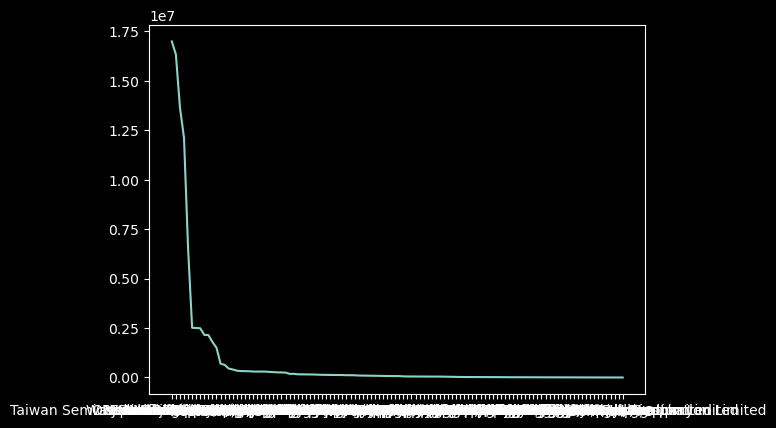

In [ ]:
import matplotlib.pyplot as plt
plt.plot(s_sorted['yhName'], s_sorted['value'])
plt.show()

In [ ]:
import math 

s_sorted_2 = [int(i) for i in s_sorted['value'] if not math.isnan(i)]  # this is how I finally removed those NaN values
s_sorted_2

[16975323,
 16321000,
 13643797,
 12110000,
 6537030,
 2509306,
 2500000,
 2485870,
 2151937,
 2142000,
 1794000,
 1500000,
 695700,
 636157,
 451311,
 403300,
 343554,
 324023,
 319467,
 315610,
 299494,
 298246,
 298043,
 297000,
 282199,
 270000,
 257632,
 254060,
 245882,
 185000,
 184438,
 161000,
 157000,
 156419,
 152299,
 149000,
 140936,
 133727,
 132574,
 127714,
 127378,
 124300,
 123704,
 114458,
 114392,
 110291,
 97537,
 96000,
 91955,
 88616,
 84911,
 84000,
 77000,
 75554,
 73435,
 71479,
 71000,
 55202,
 52000,
 50700,
 49639,
 48700,
 47707,
 45790,
 45610,
 45073,
 43982,
 43000,
 37003,
 35363,
 29414,
 25651,
 24231,
 23362,
 22000,
 21781,
 20296,
 19300,
 19000,
 18321,
 17552,
 16407,
 14757,
 13350,
 12599,
 11845,
 11447,
 11381,
 10291,
 9566,
 8965,
 7672,
 7512,
 7343,
 6855,
 6281,
 5826,
 5556,
 4406,
 4345,
 4000,
 3800,
 2692,
 2213,
 2023,
 1710,
 1465,
 589,
 341,
 237,
 0,
 0]

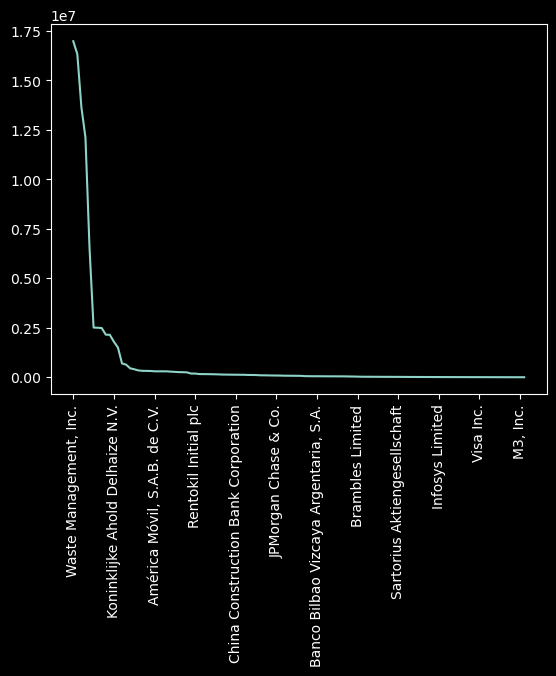

In [ ]:
x = s_sorted['yhName']
x = [str(i) for i in x]
x = x[0:115]
y = s_sorted_2
y = y[0:115]
plt.plot(x, y)
plt.xticks([10*i for i in range(12)], rotation=90)
plt.show()

## Using merge, I created a database dump

see [here](Jupyter\supernova_scrape.csv) for the csv file



In [ ]:
companies_df_filtered.dtypes

_id              object
name             object
ISIN             object
revenue_2021    float64
dtype: object

In [ ]:
c_df_f.rename(columns={'_id': 'company_id'}, inplace=True)

In [ ]:
c_df_f = companies_df_filtered.copy()
c_df_f.loc['company_id'] = c_df_f['company_id'].astype(str)
c_df_f.dtypes

company_id       object
name             object
ISIN             object
revenue_2021    float64
dtype: object

In [ ]:
metrics_df_c.loc['company_id'] = metrics_df_c['company_id'].astype(str)

C:\Users\johan\AppData\Local\Temp\ipykernel_9044\1918506297.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metrics_df_c.loc['company_id'] = metrics_df_c['company_id'].astype(str)


In [ ]:
merge_all = companies_df_filtered.merge(metrics_df_c, on='company_id')

In [ ]:
merge_all = merge_all[['name', 'label', 'value', 'reporting_period']]

In [ ]:
merge_all

,name,label,value,reporting_period
0,Microsoft Corporation,emissions_scope_1,"118,10032",2020
1,Microsoft Corporation,emissions_scope_2_location,4102445,2020
2,Microsoft Corporation,female_employees,26.3,2020
3,Microsoft Corporation,carbon_offsets,"612,927",2020
4,Microsoft Corporation,ceo_pay_ratio,257,2020
...,...,...,...,...
44929,Klepierre,female_employees,,2020
44930,Klepierre,Gender_balance_of_the_company’s_executives_and...,36,2020
44931,Klepierre,Gender_balance_of_the_company’s_board_of_direc...,44,2020
44932,Klepierre,employee_turnover,12,2019


In [ ]:
merge_all.to_csv('supernova_scrape.csv', sep=';', index=True)